# 逻辑回归


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

### 预览数据 && 绘制散点图


In [2]:
data = pd.read_csv(
    "ex2data1.txt", header=None, names=["example_1", "example_2", "Admitted"]
)
data.head()

,example_1,example_2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


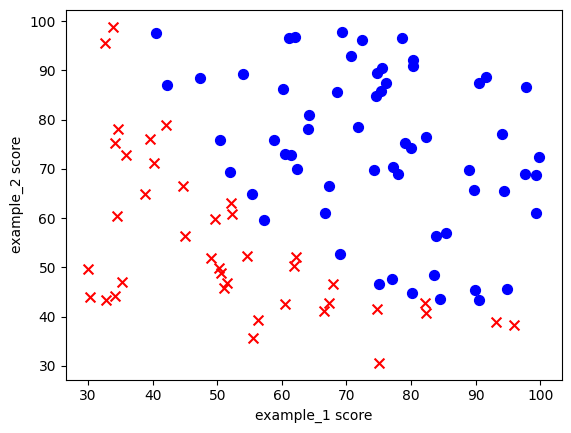

In [3]:
positive = data[data["Admitted"] == 1]
negative = data[data["Admitted"] == 0]
fig, ax = plt.subplots()

ax.scatter(positive["example_1"], positive["example_2"], s=50, c="b", marker="o")
ax.scatter(negative["example_1"], negative["example_2"], s=50, c="r", marker="x")
ax.set_xlabel("example_1 score")
ax.set_ylabel("example_2 score")

plt.show()

### 代价函数
$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}$

In [4]:
x_ = data[["example_1", "example_2"]]
x_.insert(0, "ones", 1)
x = np.array(x_)
y = np.array(data[["Admitted"]])
theta = np.zeros(x.shape[1])
x.shape, y.shape, theta.shape

((100, 3), (100, 1), (3,))

In [5]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))


sigmoid(0)


def costFunction(theta: np.ndarray, x: np.ndarray, y: np.ndarray):
    theta = theta.reshape(1, -1)
    m = x.shape[0]
    h = np.log(sigmoid(x @ theta.T))  # (m,n)
    return np.sum((-y * h) - (1 - y) * np.log(1 - sigmoid(x @ theta.T))) / m


costFunction(theta, x, y)

0.6931471805599453

## gradient descent(梯度下降)
* 这是批量梯度下降（batch gradient descent）  
* 转化为向量化计算： $\frac{1}{m} X^T( Sigmoid(X\theta) - y )$
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

In [6]:
def gradient(theta: np.ndarray, x: np.ndarray, y: np.ndarray):
    theta = theta.reshape(1, -1)
    m = x.shape[0]
    n = theta.shape[1]
    grad = np.zeros(n)
    error = sigmoid(x @ theta.T) - y  # type: ignore
    for j in range(n):
        term = np.multiply(error, x[:, j].reshape(-1, 1))
        grad[j] = np.sum(term) / m  # type: ignore

    return grad


gradient(theta, x, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [7]:
result = opt.fmin_tnc(func=costFunction, x0=theta, fprime=gradient, args=(x, y))

  NIT   NF   F                       GTG
    0    1  6.931471805599453E-01   2.71082898E+02
    1    3  6.318123602631537E-01   7.89087138E-01
    2    5  5.892425215690646E-01   7.39226659E+01
    3    7  4.227824013349988E-01   1.85265719E+01
    4    9  4.072926963747109E-01   1.68671130E+01
    5   11  3.818854870221429E-01   1.07735103E+01
    6   13  3.786234850041487E-01   2.31584929E+01
tnc: stepmx = 1000
    7   16  2.389268198743758E-01   3.00821998E+00
    8   18  2.047203892405198E-01   1.52227867E-01
    9   20  2.046713898944703E-01   6.62495276E-02
   10   22  2.035303162361215E-01   9.30780876E-04
tnc: fscale = 32.7775
   11   24  2.035293521271776E-01   8.07191978E-06
   12   26  2.035251112915609E-01   1.80213714E-04
   13   28  2.034984109909704E-01   5.02878482E-04
   14   30  2.034978382926863E-01   9.92360567E-06
   15   32  2.034977907837327E-01   3.77843767E-06
   16   34  2.034977388898613E-01   1.94830212E-05
   17   36  2.034977015894746E-01   2.33850311E-13


In [8]:
costFunction(result[0], x, y)
theta = result[0]

In [20]:
x3 = np.array([i for i in range(100)])
y3 = - (theta[0] + theta[1] * x3) / theta[2]

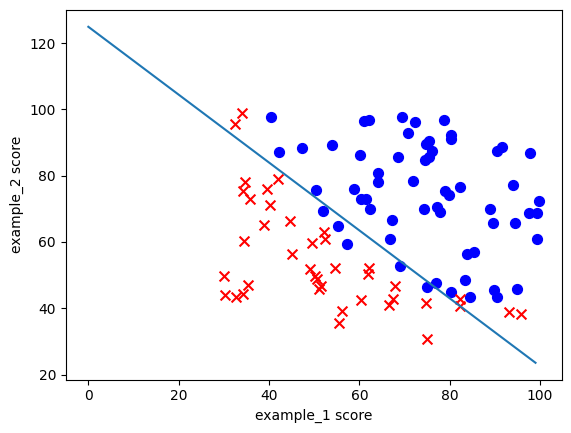

In [22]:
positive = data[data["Admitted"] == 1]
negative = data[data["Admitted"] == 0]
fig, ax = plt.subplots()

ax.scatter(positive["example_1"], positive["example_2"], s=50, c="b", marker="o")  # type: ignore
ax.scatter(negative["example_1"], negative["example_2"], s=50, c="r", marker="x")  # type: ignore
ax.plot(x3, y3)  # type: ignore
ax.set_xlabel("example_1 score")
ax.set_ylabel("example_2 score")

plt.show()

In [11]:
def predict(theta: np.ndarray, x: np.ndarray):
    v = sigmoid(x @ theta.reshape(1, -1).T)
    return [1 if i > 0.5 else 0 for i in v]

### 预估的准确率

In [12]:
pred = predict(theta, x)
accuracy = 100 * (1 - np.sum(np.bitwise_xor(pred, y.T)) / len(pred))
f"{accuracy}%"

'89.0%'

不过这是训练集的准确率，对于测试集的表现还需要再继续评估

In [17]:
theta.shape,theta,x

((3,),
 array([-25.16131863,   0.20623159,   0.20147149]),
 array([[ 1.        , 34.62365962, 78.02469282],
        [ 1.        , 30.28671077, 43.89499752],
        [ 1.        , 35.84740877, 72.90219803],
        [ 1.        , 60.18259939, 86.3085521 ],
        [ 1.        , 79.03273605, 75.34437644],
        [ 1.        , 45.08327748, 56.31637178],
        [ 1.        , 61.10666454, 96.51142588],
        [ 1.        , 75.02474557, 46.55401354],
        [ 1.        , 76.0987867 , 87.42056972],
        [ 1.        , 84.43281996, 43.53339331],
        [ 1.        , 95.86155507, 38.22527806],
        [ 1.        , 75.01365839, 30.60326323],
        [ 1.        , 82.30705337, 76.4819633 ],
        [ 1.        , 69.36458876, 97.71869196],
        [ 1.        , 39.53833914, 76.03681085],
        [ 1.        , 53.97105215, 89.20735014],
        [ 1.        , 69.07014406, 52.74046973],
        [ 1.        , 67.94685548, 46.67857411],
        [ 1.        , 70.66150955, 92.92713789],
        [ 